# Pocket Articles Reading Data Analysis

Data Analysis and Data Visualization of Articles Read in Pocket!

NOTE: To use, first run [pocket_downloader.ipynb](https://github.com/markwk/qs_ledger/blob/master/pocket/pocket_downloader.ipynb) to download your article data.

-----

## Dependencies

In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

----

## Get Our Data

In [2]:
# unread articles
articles_unread = pd.read_csv('data/pocket_unread_articles.csv')

In [3]:
# articles read
articles_read = pd.read_csv(open('data/pocket_read_articles.csv'), encoding='utf-8', engine='c')

# drop any faulty imported
articles_read = articles_read.dropna(axis=0, subset=['time_read'])

In [4]:
articles = pd.concat([articles_read, articles_unread], sort=False)

In [5]:
print("===== Pocket Stats =====")
print('{:,} total articles'.format(len(articles)))
print('{:,} total articles read'.format(len(articles_read)))
print('{:,} total articles unread'.format(len(articles_unread)))

===== Pocket Stats =====
6,557 total articles
6,080 total articles read
477 total articles unread


----

## All Articles: Data Analysis

In [6]:
# convert with pd.to_datetime
articles['time_added'] = pd.to_datetime(articles['time_added'])
articles['time_updated'] = pd.to_datetime(articles['time_updated'])
articles.loc[articles['time_favorited'] == 'nan','time_favorited'] = np.nan
articles['time_favorited'] = pd.to_datetime(articles['time_favorited'])
articles.loc[articles['time_read'] == 'nan','time_read'] = np.nan
articles['time_read'] = pd.to_datetime(articles['time_read']) 

In [7]:
# date additions of time_added
articles['time_added_date'] = articles['time_added'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
articles['year'] = articles['time_read'].dt.year
articles['month'] = articles['time_read'].dt.month
articles['mnth_yr'] = articles['time_read'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
articles['day'] = articles['time_read'].dt.day
articles['dow'] = articles['time_read'].dt.weekday
articles['hour'] = articles['time_read'].dt.hour

In [8]:
articles_added_per_day = articles['time_added_date'].value_counts().sort_index()
articles_added_per_day.columns = ['Date', 'Count']

In [9]:
# TODO: Get Range of Dates from First Article added to Today
# first_article_date = str(articles_added_per_day.head(1).index)

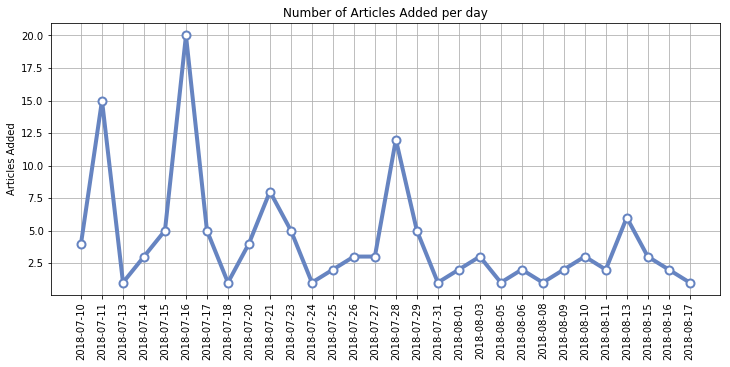

In [10]:
# a bit of a hackish solution, could use improvement
dataset = articles_added_per_day.tail(30)
chart_title = 'Number of Articles Added per day'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Articles Added')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Articles Unread: Data Processing

In [11]:
# convert with pd.to_datetime
articles_unread['time_added'] = pd.to_datetime(articles_unread['time_added'])
articles_unread['time_updated'] = pd.to_datetime(articles_unread['time_updated'])
articles_unread.loc[articles_unread['time_favorited'] == 'nan','time_favorited'] = np.nan
articles_unread['time_favorited'] = pd.to_datetime(articles_unread['time_favorited'])
# articles_unread['time_read'] = pd.to_datetime(articles_read['time_read']) # no need to convert since it's empty

-----

## Articles Read: Data Processsing

In [12]:
# convert with pd.to_datetime
articles_read['time_added'] = pd.to_datetime(articles_read['time_added'])
articles_read['time_updated'] = pd.to_datetime(articles_read['time_updated'])
articles_read.loc[articles_read['time_favorited'] == 'nan','time_favorited'] = np.nan
articles_read['time_favorited'] = pd.to_datetime(articles_read['time_favorited'])
articles_read['time_read'] = pd.to_datetime(articles_read['time_read']) 

In [13]:
# date additions of time_read
articles_read['time_read_date'] = articles_read['time_read'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
articles_read['year'] = articles_read['time_read'].dt.year
articles_read['month'] = articles_read['time_read'].dt.month
articles_read['mnth_yr'] = articles_read['time_read'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
articles_read['day'] = articles_read['time_read'].dt.day
articles_read['dow'] = articles_read['time_read'].dt.weekday
articles_read['hour'] = articles_read['time_read'].dt.hour

In [14]:
articles_read_per_day = articles_read['time_read_date'].value_counts().sort_index()
articles_read_per_day.columns = ['Date', 'Count']

In [15]:
# TODO: Get Range of Dates from First Article added to Today
# first_article_date = str(articles_added_per_day.head(1).index)

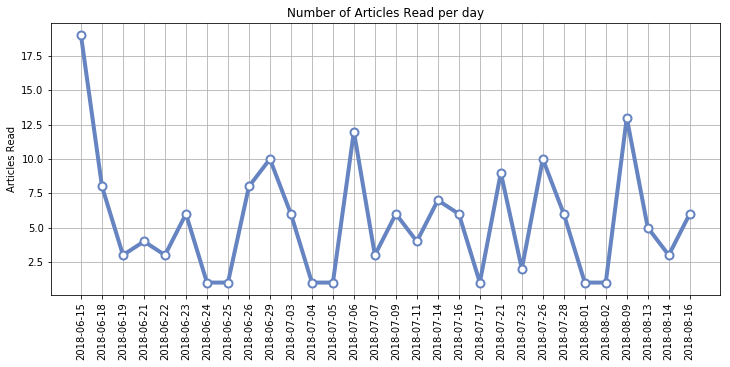

In [16]:
# a bit of a hackish solution, could use improvement
dataset = articles_read_per_day.tail(30)
chart_title = 'Number of Articles Read per day'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Articles Read')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Analysis by Year

In [17]:
year_counts = articles_read['year'].value_counts().sort_index()
year_counts

2013    1863
2014    2398
2015     929
2016     157
2017       1
2018     732
Name: year, dtype: int64

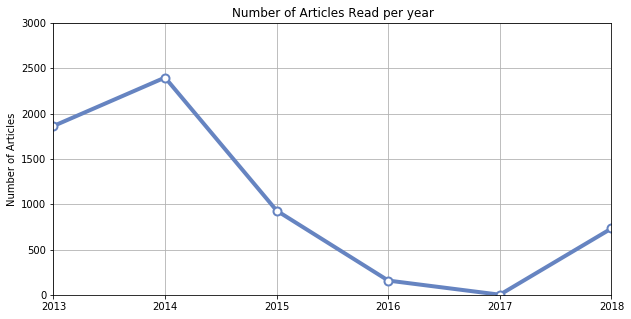

In [18]:
dataset = year_counts
chart_title = 'Number of Articles Read per year'

ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 3000)
ax.set_xticks(dataset.index)
ax.set_ylabel('Number of Articles')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

-----

## Monthly Analysis

In [19]:
month_counts = articles_read['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Date', 'Count']
month_counts.tail()

2018-04    88
2018-05    47
2018-06    88
2018-07    74
2018-08    29
Name: mnth_yr, dtype: int64

In [20]:
# not every month necessarily has a highlight, so fill in missing months with zero counts
#date_range = pd.date_range(start=min(highlights_10['timestamp']), end=max(highlights_10['timestamp']))
#months_range = date_range.map(lambda x: str(x.date())[:-3])
#index = np.unique(months_range)
# month_counts = month_counts.reindex(index, fill_value=0)

In [21]:
# maximum articles read in a month
max_per_month = month_counts.max()
print('Most articles read in a month: {:,}'.format(max_per_month))

Most articles read in a month: 503


In [22]:
# total months
len(month_counts)

46

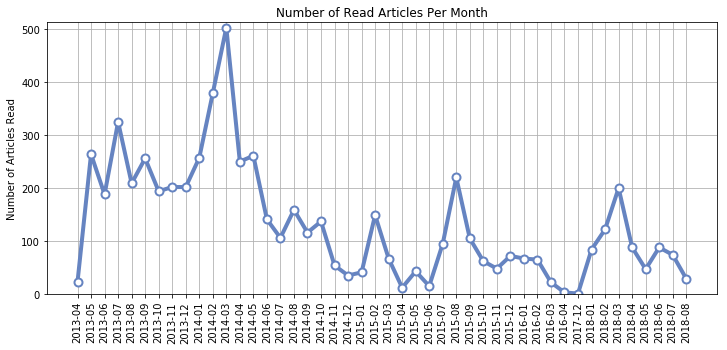

In [24]:
# a bit of a hackish solution, could use improvement
dataset = month_counts.tail(46)
chart_title = 'Number of Read Articles Per Month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0,(max_per_month + 10))
ax.set_xticks(index)
ax.set_ylabel('Number of Articles Read')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()